<a href="https://colab.research.google.com/github/flatplanet/Pytorch-Tutorial-Youtube/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2: Neural Network using PyTorch

In [69]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F


## Create a Model ( with three hidden layers)

In [70]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(5, 9)  # 5 input features
        self.fc2 = nn.Linear(9, 8)
        self.fc3 = nn.Linear(8, 7)
        self.fc4 = nn.Linear(7, len(np.unique(y)))  # Output layer size

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:

my_df = pd.read_csv('cars.csv')
my_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Tentative Steps:
## Find co-relation
## Train Test Split!  Set X, y
## Split the data to training and testing
## Set the criterion of model to measure the error, how far off the predictions are from the data
## Choose an Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
## Train our model!
## Epochs? (one run thru all the training data in our network)
## Graph it out!
## Evaluate Model on Test Data Set (validate model on test set)
## save the model
## Load the model and test it on train and test data

Epoch 1/100 Loss: 1.5390467352983428
Epoch 11/100 Loss: 1.4749713670916673
Epoch 21/100 Loss: 1.3959712051763766
Epoch 31/100 Loss: 1.3015509931052602
Epoch 41/100 Loss: 1.2002733945846558
Epoch 51/100 Loss: 1.0975747864420822
Epoch 61/100 Loss: 1.0091075402934377
Epoch 71/100 Loss: 0.9552994646677156
Epoch 81/100 Loss: 0.922260219004096
Epoch 91/100 Loss: 0.89737893023142
Test Loss: 1.0920194387435913


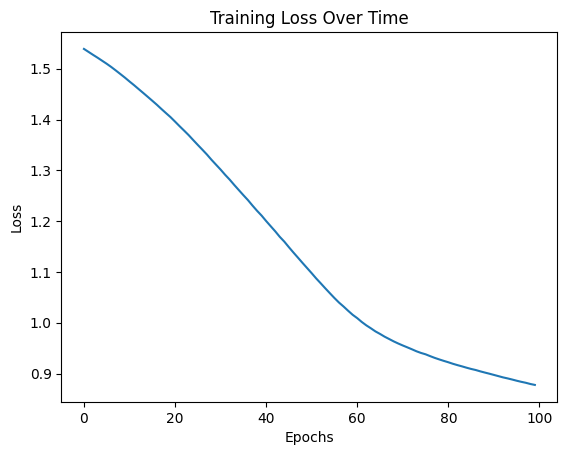

In [73]:
# carbody is the target, encode
le = LabelEncoder()
my_df['carbody'] = le.fit_transform(my_df['carbody'])

# Selecting the top five features after correlation analysis (features seleted randomly)
selected_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight']
X = my_df[selected_features]
y = my_df['carbody']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate model, loss function, and optimizer
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Initialize a list to track the loss at each epoch
losses = []

# Training Loop
epochs = 100
for epoch in range(epochs):
    total_loss = 0
    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * inputs.size(0)
    epoch_loss = total_loss / len(train_loader.dataset)
    losses.append(epoch_loss)
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs} Loss: {epoch_loss}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
print(f'Test Loss: {test_loss.item()}')

# Save the model
torch.save(model.state_dict(), 'car_classification_model.pth')

# Plot training and validation loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()